<center><font size="5"> TP 2 : Approximation des valeurs propres </font> </center>

# Introduction

Les valeurs propres apparaissent fréquemment dans de nombreux contextes où l'on cherche à analyser la **stabilité des systèmes** ou à comprendre les modes de vibration dans des structures mécaniques. Elles jouent également un rôle crucial dans l'analyse des réseaux, comme dans l'algorithme **PageRank de Google**, ainsi qu'en **intelligence artificielle**, où elles sont utilisées pour le **clustering** et la **réduction de dimension** dans l'analyse de données.



Dans ce TP, nous allons implémenter et explorer la méthode de la puissance, une technique itérative utilisée pour calculer la valeur propre dominante (celle de plus grand module) et le vecteur propre associé d'une matrice carrée.

## 1. Méthode de la puissance

La méthode de la puissance permet de calculer la plus grande valeur propre (en valeur absolue) d'une matrice 
$A$. On se propose d'utiliser cette méthode pour calculer cette valeur propre pour la matrice suivante:
$$
A_1 = \begin{pmatrix}
-4 & 14 & 0 \\
-3 & 13 & 0 \\
-1 & 0 & 2
\end{pmatrix}
$$

### 1.1 Implémentation de la méthode de la puissance

On rappelle l'algorithme suivant, vu en cours : 

<font size="3">**Algorithme : Méthode de la puissance**</font><br>
**Nécessite** : $A$ une matrice, $x_0$ un vecteur <br>
$\text{} \qquad k \leftarrow 0 $ <br>
$\text{} \qquad$ **Répéter** <br>
$\text{} \qquad \qquad x_{k+1} \leftarrow \frac{Ax_k}{\Vert Ax_k \Vert_2}$ <br>
$\text{} \qquad \qquad \lambda_{k+1} \leftarrow\ x_{k+1}^TAx_{k+1}$ <br>
$\text{} \qquad \qquad k \leftarrow k + 1$ <br>
$\text{} \qquad $ **jusqu'à convergence** <br>
**Retourne** $\lambda_{k+1}$, $x_{k+1}$ et $k$

- Quel est le critère de convergence ? A quel moment on arrête l'algorithme ?

- Créez et affichez la matrice $A_1$

In [3]:
# Importation des librairies
import numpy as np
from numpy import linalg as la

# Création et affichage de la martrice A1
# ... A compléter ...
# A_1 = \begin{pmatrix}
# -4 & 14 & 0 \\
# -3 & 13 & 0 \\
# -1 & 0 & 2
# \end{pmatrix}
A1 = np.array([[-4, 14, 0], [-3, 13, 0], [-1, 0, 2]])
print(A1)

[[-4 14  0]
 [-3 13  0]
 [-1  0  2]]



- Écrivez une fonction <tt>lambda1, v1, niter = puissance(A, x0, tol, iterMax)</tt> qui implémente cette méthode. Les paramètres d'entrée sont : la matrice carrée **A**, le vecteur initiale **x0**, la tolérance pour la convergence **tol**, et le nombre d'itérations maximal **iterMax**.<br>La fonction doit retourner en sortie: la valeur propre de plus grand module **lambda1**, le vecteur propre associé $v1$ ainsi que le nombre d'itérations nécessaires **nIter**.

- Testez votre fonction avec en entrée la matrice $A_1$ et les paramètres **x0**, **tol** et **iterMax** çi-dessous.

In [24]:
# Fonction puissance

def  puissance(A, x0, tol, iterMax):
    n = len(x0)
    xk = x0
    xk1 = np.zeros(n)
    nIter = 0
    lambda0 = 0
    while(True):
        nIter += 1
        xk1 = np.dot(A, xk) / la.norm(np.dot(A, xk))
        lambda1 = np.dot(np.dot(A, xk1), xk1)
        if (nIter > iterMax) or (abs(lambda1 - lambda0) < tol):
            break
        xk = xk1
        lambda0 = lambda1
    return lambda1, xk1, nIter
    
# Affichage de la plus grande valeur propre de la matrice A1, du vecteur propre associé et du nombre d'itérations en appelant la fonction puissance
x0 = np.array([1,1,1])
tol = 1e-8
iterMax = 100
lambda1, xk1, nIter = puissance(A1, x0, tol, iterMax)
print("Valeur propre : ", lambda1)
print("Vecteur propre : ", xk1)
print("Nombre d'itérations : ", nIter)
print("Test : ", np.dot(A1, xk1) - lambda1 * xk1)

Valeur propre :  10.00000000228614
Vecteur propre :  [ 0.70436073  0.70436073 -0.08804509]
Nombre d'itérations :  12
Test :  [-1.61026570e-09 -1.61026659e-09 -2.57642705e-08]


- Comparez votre résultat avec celui de la fonction **np.linalg.eig()** de Python.
  
- Tracez la courbe de convergence en fonction du nombre d'itérations. **Astuce:** utilisez le log-scale pour améliorer la lisibilité des courbes d'erreur.

Comparaison avec np.linalg.eig() : 
Valeurs propres :  [ 2. 10. -1.]
Vecteurs propres :  [[ 0.          0.70436073  0.9296678 ]
 [ 0.          0.70436073  0.19921453]
 [ 1.         -0.08804509  0.30988927]]
Difference avec mes resultats:  2.286139277885013e-09


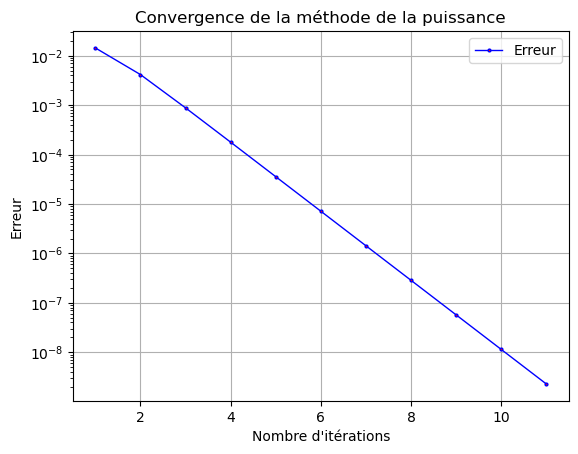

In [25]:
# Comparer avec np.linalg.eig()
tol = 1e-8
print("Comparaison avec np.linalg.eig() : ")
w, v = np.linalg.eig(A1)
print("Valeurs propres : ", w)
print("Vecteurs propres : ", v)
maxvp = max(w)
print("Difference avec mes resultats: ", abs(lambda1 - maxvp))

import matplotlib.pyplot as plt
xs = [abs(maxvp - puissance(A1, x0, tol, i)[0]) for i in range(1, 12)]
rang = np.arange(1, 12)


fig = plt.figure()
#logscale

plt.plot(rang, xs, label='Erreur', color='blue', marker='o', linestyle='-', linewidth=1, markersize=2, markerfacecolor='red')
plt.yscale('log')
plt.xlabel('Nombre d\'itérations')
plt.ylabel('Erreur')
plt.title('Convergence de la méthode de la puissance')
plt.grid()
plt.legend()

plt.show()

### 1.2 Convergence théorique

La vitesse de convergence de la méthode de la puissance dépend du **rapport spectral** entre la valeur propre dominante $ \lambda_1 $ et la deuxième plus grande valeur propre $ \lambda_2 $ (en valeur absolue). Ce rapport spectral est défini par :
$$
\frac{|\lambda_2|}{|\lambda_1|}
$$
En d'autres termes, l'erreur après  $k$ itérations est approximativement :
$$
\text{Erreur} \approx \left( \frac{|\lambda_2|}{|\lambda_1|} \right)^k
$$
Cela signifie que la méthode de la puissance converge de manière exponentielle, et plus le rapport spectral est proche de 0, plus la convergence est rapide.


**A faire:** <BR>
- Calculez la deuxieme plus grande valeur propre $\lambda_2$ de la matrice $A_1$ en utilisant la fonction **np.linalg.eig** de Python.<br>
- Utilisez $\lambda_1$ et $\lambda_2$ pour calculer la vitesse de convergence théorique et tracez la courbe en fonction du nombre d'itérations. 
- Comparez la courbe de convergence théorique avec la convergence réelle observée dans votre implémentation de la méthode de la puissance.

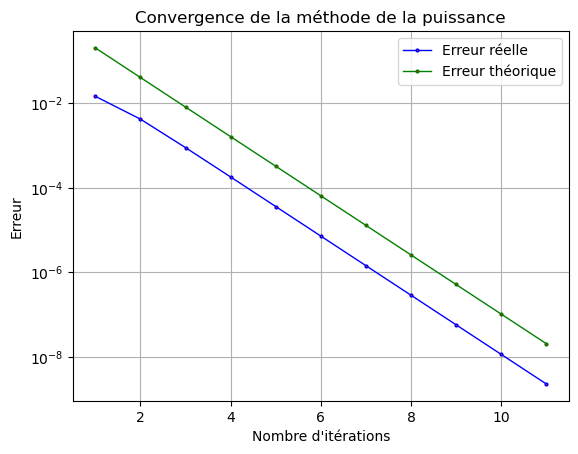

In [26]:
import matplotlib.pyplot as plt
# Calcul de la deuxieme plus grande valeur propre
w, v = np.linalg.eig(A1)
deuxieme_valp = sorted(w)[-2]
# Courbes de convergence théorique et réelle de la methode de puissance

erreur_theorique = [(deuxieme_valp/maxvp)**i for i in range(1, 12)]

plt.plot(rang, xs, label='Erreur réelle', color='blue', marker='o', linestyle='-', linewidth=1, markersize=2, markerfacecolor='red')
plt.plot(rang, erreur_theorique, label='Erreur théorique', color='green', marker='o', linestyle='-', linewidth=1, markersize=2, markerfacecolor='red')
plt.yscale('log')
plt.xlabel('Nombre d\'itérations')
plt.ylabel('Erreur')
plt.title('Convergence de la méthode de la puissance')
plt.grid()
plt.legend()

plt.show()

## 2. Méthode de la puissance inverse

**Rappel**: La méthode de la puissance inverse permet de calculer la plus petite valeur propre d'une matrice 
$A$. Pour cela, on applique la méthode de la puissance à la matrice $A^{-1}$ .

On rappelle l'algorithme suivant, vu en cours. 

<font size="4">**Algorithme : Méthode de la puissance inverse**</font><br>
**Nécessite** : $A$ une matrice, $x_0$ un vecteur <br>
$\text{} \qquad k \leftarrow 0 $ <br>
$\text{} \qquad$ **Répéter** <br>
$\text{} \qquad \qquad x_{k+1} \leftarrow \frac{A^{-1}x_k}{\Vert A^{-1}x_k \Vert_2}$ <br>
$\text{} \qquad \qquad \lambda_{k+1} \leftarrow\ x_{k+1}^TAx_{k+1}$ <br>
$\text{} \qquad \qquad k \leftarrow k + 1$ <br>
$\text{} \qquad $ **jusqu'à convergence** <br>
**Retourne** $\lambda_{k+1}$, $x_{k+1}$ et $k$

- Pourquoi la méthode de la puissance inverse donne-t-elle la plus petite valeur propre de A ?

En général on ne calcule pas explicitement $A^{-1}$. Ainsi $A^{-1}x_k$ s'obtient en résolvant le système linéaire $Ay_k = x_k$  en utilisant une factorisation de $A$, qui est réalisée au début de l'algorithme.  
- Proposez une reformulation de l'algorithme qui ne nécessite pas d'inverser explicitement la matrice $A$.

- Ecrivez une fonction <tt>lambda1, v1, niter = puissanceInverse(A, x0, tol, iterMax)</tt> qui implémente cette méthode. Les paramètres d'entrée sont : la matrice carrée **A**, le vecteur initiale **x0**, la tolérance pour la convergence **tol**, et le nombre maximal d'itérations **iterMax**. La fonction doit retourner en sortie: la plus grande valeur propre, le vecteur propre associé ainsi que le nombre d'itérations nécessaires **nIter**. Pour la factorisation de la matrice, nous utiliserons la **lu_factor** et **lu_solve**.

- Testez votre fonction avec en entrée la matrice $A_1$ et les paramètres çi-dessous en distinguant 2 cas selon la valeur initiale $x0$. Que peut-on dire du choix de $x0$ ?

In [29]:
from scipy.linalg import lu_factor, lu_solve

# Fonction puissance inverse
def puissanceInverse(A, x0, tol, iterMax):

    # Factorisation LU de la matrice (à ne faire qu'une seule fois)
    LU, P = lu_factor(A)

    # Initialisation du vecteur initial x0
    xk = x0
    niter = 0

    # Iterations jusqu'au critère d'arrêt.
    while(True):
        niter += 1
        xk1 = lu_solve((LU, P), xk) # equivalent y_k, y_k vaut A^-1 x tel que mentionné plus haut
        xk1 = xk1 / la.norm(xk1)
        lambda1 = np.dot(np.dot(A, xk1), xk1)
        if (abs(lambda1 - np.dot(np.dot(A, xk), xk)) < tol or niter > iterMax):
            break
        xk = xk1
        

    return lambda1, xk1, niter
    
# Affichage de la plus petite valeur propre de la matrice A1, du vecteur propre associé et du nombre d'itérations en appelant la fonction puissance
tol = 1e-8
iterMax = 100

# cas 1: 
x0 = np.array([1,1,1])
lambda1, xk1, nIter = puissanceInverse(A1, x0, tol, iterMax)

print("Vecteur init : ", x0)
print("Valeur propre : ", lambda1)
print("Vecteur propre : ", xk1)
print("Nombre d'itérations : ", nIter)

# cas 2: 
x0 = np.array([0,1,1])
lambda2, xk2, nIter = puissanceInverse(A1, x0, tol, iterMax)

print("Vecteur init : ", x0)
print("Valeur propre : ", lambda2)
print("Vecteur propre : ", xk2)
print("Nombre d'itérations : ", nIter)


Vecteur init :  [1 1 1]
Valeur propre :  1.9999999992728505
Vecteur propre :  [7.27149423e-10 7.27957440e-10 1.00000000e+00]
Nombre d'itérations :  13
Vecteur init :  [0 1 1]
Valeur propre :  -0.9999999979972687
Vecteur propre :  [0.9296678  0.19921453 0.30988927]
Nombre d'itérations :  29


## 3. Exercice récapitulatif:  équation de Poisson en 1D

On considère la matrice suivante issue de la discrétisation de l'Équation de Poisson en 1D:

$
A = 
\begin{pmatrix}
-2 & 1 & 0 & 0 & \dots & 0 \\
1 & -2 & 1 & 0 & \dots & 0 \\
0 & 1 & -2 & 1 & \dots & 0 \\
0 & 0 & 1 & -2 & \dots & 0 \\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots \\
0 & 0 & 0 & 0 & \dots & 1 \\
0 & 0 & 0 & 0 & \dots & -2
\end{pmatrix}
$

où A est une matrice de taille n x n

- Construisez la matrice pour n = 5 

In [31]:
import numpy as np

# Construction de la matrice issue de la discrétisation de l'Équation de Poisson en 1D
def poisson_1d(n):
    
    # Initialiser une matrice n x n avec des zéros
    A = np.zeros((n, n))
    
    # Remplir la diagonale principale
    A = -2 * np.eye(n)
    
    # Remplir la diagonale adjacente inférieur
    A = A + np.diag(np.ones(n-1), -1)

    # Remplir la diagonale adjacente supérieur   
    A = A + np.diag(np.ones(n-1), 1)

    return A

# Création de la matrice
n = 5  # Taille de la grille
A = poisson_1d(n)
print(A)

[[-2.  1.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.]
 [ 0.  1. -2.  1.  0.]
 [ 0.  0.  1. -2.  1.]
 [ 0.  0.  0.  1. -2.]]


- Pour n = 5, utilisez la méthode de puissance pour calculer la plus grande valeur propre de $A$

In [32]:
lambda1, xk1, nIter = puissance(A, np.ones(n), 1e-8, 100)
print("Valeur propre : ", lambda1)
print("Vecteur propre : ", xk1)
print("Nombre d'itérations : ", nIter)

Valeur propre :  -3.7320508063454207
Vecteur propre :  [-0.28869048  0.5        -0.57733492  0.5        -0.28869048]
Nombre d'itérations :  19


- Pour n = 100:
- Afficher les courbes de convergences de la méthode de puissance et la méthode de puissance inverse en fonction du nombre d'itérations, ainsi que la plus grande valeur propre.
- Evaluez l'influence du vecteur initiale $x_0$ sur la convergence

Valeur propre :  -3.9704433497536953
Nombre d'itérations :  101
Valeur propre max :  -3.9990325645839775
Valeur propre min :  -0.0009674354160222779


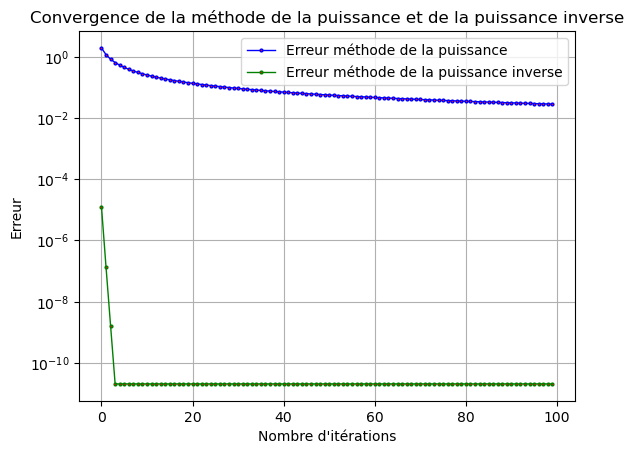

In [47]:
# pour n = 100 cett fois
n = 100
A = poisson_1d(n)
lambda1, xk1, nIter = puissance(A, np.ones(n), 1e-8, 100)
print("Valeur propre : ", lambda1)
print("Nombre d'itérations : ", nIter)

true_answers = np.linalg.eig(A)[0] # les valeurs propres de A
lemin = max(true_answers) # min en vabs
lemax = min(true_answers) # max en vabs

print("Valeur propre max : ", lemax)
print("Valeur propre min : ", lemin)

x0 = np.ones(n)
#x0[0] = 0

errMyLamdas = [abs(puissance(A, x0, 1e-8, i)[0] - lemax) for i in range(n)]
errMyLamdas = np.array(errMyLamdas)

errMyLambdasInverse = [abs(puissanceInverse(A, x0, 1e-8, i)[0] - lemin) for i in range(n)]
errMyLambdasInverse = np.array(errMyLambdasInverse)

plt.plot(range(n), errMyLamdas, label='Erreur méthode de la puissance', color='blue', marker='o', linestyle='-', linewidth=1, markersize=2, markerfacecolor='red')
plt.plot(range(n), errMyLambdasInverse, label='Erreur méthode de la puissance inverse', color='green', marker='o', linestyle='-', linewidth=1, markersize=2, markerfacecolor='red')
plt.yscale('log')
plt.xlabel('Nombre d\'itérations')
plt.ylabel('Erreur')
plt.title('Convergence de la méthode de la puissance et de la puissance inverse')
plt.grid()
plt.legend()

plt.show()